In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import xarray as xr
from tqdm import tqdm
from RPLB_acc_LC import RPLB_acc_LC

In [11]:
# set pure spectral properties
lambda_0 = 800e-9  # central wavelength
tau_0 = 10e-15  # FL pulse duration 1/e2 intensity half-width (same def as beam waist)
# set initial beam waist
w_0 = 4e-6
# calculate Rayleigh range
z_R = (np.pi*w_0**2)/(lambda_0)
# beam power
P = 100e12
# spectral phase
GDD = 0*(1e-15)**2
TOD = 0*(1e-15)**3
# intial electron velocity
beta_0 = 0
# set tuning parameters
z_0 = np.linspace(-0.2*z_R, +0.2*z_R, 9, endpoint=True)
Psi_0 = np.linspace(0, 2*np.pi, 14, endpoint=False)
tau_p = np.linspace(-3, +1, 9)*(1e-15)

In [12]:
# create result variable
KE_final = np.zeros(shape=(len(z_0), len(Psi_0), len(tau_p)))
#loop over inital position of test particle
for i in range(0, len(z_0)):
    # loop over CEO phase of laser
    for j in range(0, len(Psi_0)):
        # loop over tau_p
        for k in range(0, len(tau_p)):
            KE_final[i, j, k] = RPLB_acc_LC(lambda_0, tau_0, w_0, P, Psi_0[j], GDD, TOD, z_0[i], beta_0, tau_p[k])


KeyboardInterrupt: 

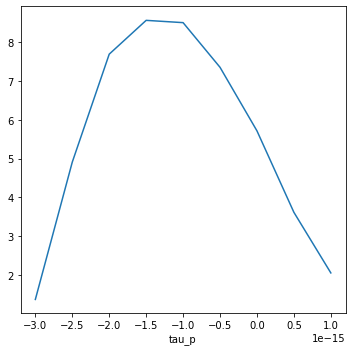

In [15]:
KE_final = xr.DataArray(KE_final, coords=[z_0/z_R, Psi_0, tau_p], dims=['z_0', 'CEO', 'tau_p'])

plt.figure(figsize=(5, 5))

(KE_final.max(dim='z_0').max(dim='CEO')/1e6).plot()

plt.tight_layout()